In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

football_df = pd.read_csv('football.csv')

In [132]:
football_df.head()

,Team,Season2016Wins,Season2017Wins
0,X1,3,5
1,X2,3,4
2,X3,2,8
3,X4,2,3
4,X5,6,2


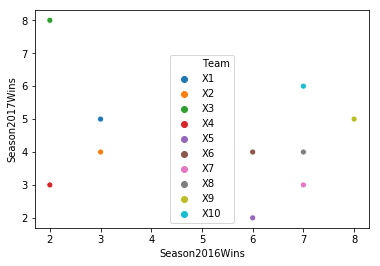

In [133]:
ax = sns.scatterplot(x='Season2016Wins', y="Season2017Wins", hue="Team", data=football_df)

In [134]:
import math
from enum import Enum
from sklearn.preprocessing import normalize

MAX_ITERATION = 100

class DistanceMetric(Enum):
    MANHATTAN = 0
    EUCLIDEAN = 1
    COSINE = 2,
    JACCARD = 3

def manhattan(X, p):
    return np.sum(np.abs(X-p), axis=1).reshape(-1, 1)

def euclidean(X, p):
    return np.sum((X-p)**2, axis=1).reshape(-1, 1)

def cosine(X, p):
    return 1-normalize(X.reshape(-1, X.shape[1]), axis=1).dot(normalize(p.reshape(-1, 1), axis=0))

def jaccard(X, p):
    return (1-np.sum(np.minimum(X,p),axis=1)/np.sum(np.maximum(X,p),axis=1)).reshape(-1,1)

def sse(X, clusters, centroids, metric=euclidean):
    result = 0
    for i, centroid in enumerate(centroids):
        result += np.sum(metric(X[np.where(clusters==i)], centroid))
    
    return result

#Q4
# End conditions:
# no change in centroid
# SSE increases
# iteration 100 is reached
def kmeans(X, centroids, k=3, metric=DistanceMetric.MANHATTAN, tol=1e-9, seed=42, max_iter=MAX_ITERATION):
    np.random.seed(seed)
    
    if centroids is None:
        centroids = X[np.random.choice(len(X), size=k, replace=False)]
    
    centroids = np.asarray(centroids)
    metrics = {
        DistanceMetric.MANHATTAN: manhattan,
        DistanceMetric.EUCLIDEAN: euclidean,
        DistanceMetric.COSINE: cosine,
        DistanceMetric.JACCARD: jaccard
    }
                                     
    i = 0
    prev_sse = None
    curr_sse = None
    old_clusters = None
    
    while i < max_iter:
        distances = []
        
        for centroid in centroids:
            distances.append(metrics[metric](X, centroid))

        distance = np.concatenate(distances, axis=1)
        clusters = np.argmin(distance, axis=1)
        curr_sse = sse(X, clusters, centroids)
        new_centroids = [(np.mean if metric != DistanceMetric.MANHATTAN else np.median)(X[np.where(clusters==i)], axis=0) for i in range(len(centroids))]
        new_distance = 0

        for x, y in zip(centroids, new_centroids):
            new_distance += metrics[metric](np.array([list(x)]), np.array(list(y)))
        
        i = i + 1
        
        if math.isclose(new_distance, 0, abs_tol=tol) or (prev_sse is not None and prev_sse < curr_sse):
            if (prev_sse is not None and prev_sse < curr_sse):
                clusters = old_clusters
            
            print('Number of iterations: {}'.format(i))
            print('SSE: {}'.format(prev_sse if prev_sse < curr_sse else curr_sse))
            return clusters
        
        prev_sse = curr_sse
        old_clusters = clusters
        centroids = new_centroids

def cluster_and_scatter(df, X, centroids, metric=DistanceMetric.MANHATTAN):
    clusters = kmeans(X, centroids, metric=metric)
    df['clusters'] = clusters
    ax = sns.scatterplot(x='Season2016Wins', y="Season2017Wins", hue='clusters', data=df)


Number of iterations: 3
SSE: 29.0


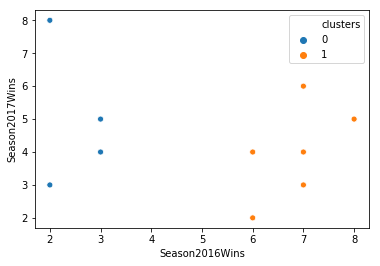

In [135]:
#1.1
X = football_df.values[:, 1:]
cluster_and_scatter(football_df, X, [[4,6], [5,4]])

Number of iterations: 3
SSE: 27.833333333333332


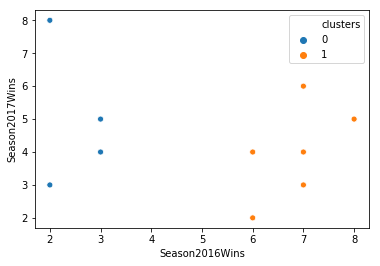

In [136]:
#1.2
cluster_and_scatter(football_df, X, [[4,6], [5,4]], metric=DistanceMetric.EUCLIDEAN)

Number of iterations: 2
SSE: 29.0


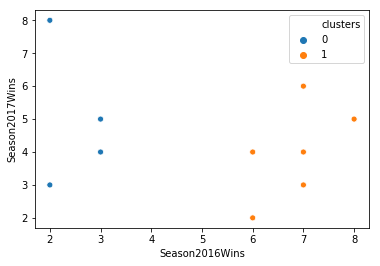

In [137]:
#1.3
cluster_and_scatter(football_df, X, [[3,3], [8,3]])

Number of iterations: 2
SSE: 74.0


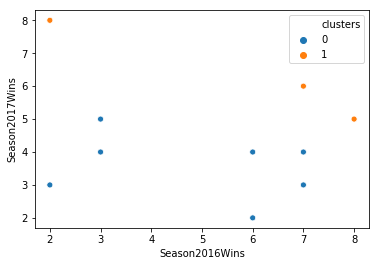

In [138]:
#1.4
cluster_and_scatter(football_df, X, [[3,2], [4,8]])

Number of iterations: 2
SSE: 27.833333333333332


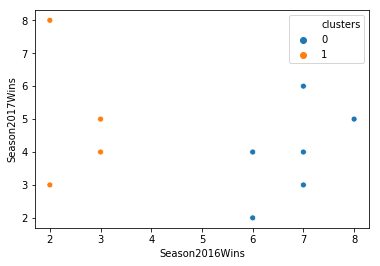

In [139]:
cluster_and_scatter(football_df, X, [[3,2], [4,8]], metric=DistanceMetric.COSINE)

Number of iterations: 2
SSE: 59.83333333333333


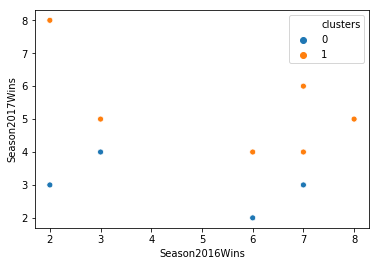

In [140]:
cluster_and_scatter(football_df, X, [[3,2], [4,8]], metric=DistanceMetric.JACCARD)

In [141]:
from sklearn.datasets import load_iris
iris = load_iris()

In [142]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [143]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [144]:
#Q1 - Euclidean + Q3
euclidean_clusters = kmeans(iris.data, None, k=3, metric=DistanceMetric.EUCLIDEAN)
euclidean_clusters

Number of iterations: 6
SSE: 78.94084142614601


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [145]:
#Q1 - Cosine + Q3
cosine_clusters = kmeans(iris.data, None, k=3, metric=DistanceMetric.COSINE)
cosine_clusters

Number of iterations: 5
SSE: 92.07870917874396


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [146]:
#Q1 - Jaccard + Q3
jaccard_clusters = kmeans(iris.data, None, k=3, metric=DistanceMetric.JACCARD)
jaccard_clusters

Number of iterations: 5
SSE: 79.18674974533107


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [147]:
# Q2
from scipy import stats
from sklearn.metrics import accuracy_score

def predict(clusters, y, k=3):
    idxs = []
    labels = []
    for i in range(k):
        idxs.append(np.where(clusters == i))
    for cluster in idxs:
        mode = int(stats.mode(y[cluster])[0])
        clusters[cluster] = mode
        
    return clusters

for clusters, method in zip((euclidean_clusters, cosine_clusters, jaccard_clusters), ('euclidean', 'cosine', 'jaccard')):
    acc = accuracy_score(iris.target, predict(clusters, iris.target))
    print('accuracy for {} distance metric: {:.2f}'.format(method, acc))
    

accuracy for euclidean distance metric: 0.89
accuracy for cosine distance metric: 0.97
accuracy for jaccard distance metric: 0.88


In [148]:
df = sns.load_dataset('iris')

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [150]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [151]:
from sklearn import preprocessing
normalized_iris = preprocessing.normalize(iris.data, norm='l2')

In [152]:
euclidean_clusters = kmeans(normalized_iris, None, k=3, metric=DistanceMetric.EUCLIDEAN)
euclidean_clusters

Number of iterations: 6
SSE: 0.3232076454434728


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [153]:
cosine_clusters = kmeans(normalized_iris, None, k=3, metric=DistanceMetric.COSINE)
cosine_clusters

Number of iterations: 6
SSE: 0.3232076454434728


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [154]:
jaccard_clusters = kmeans(normalized_iris, None, k=3, metric=DistanceMetric.JACCARD)
jaccard_clusters

Number of iterations: 6
SSE: 0.3232076454434728


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [155]:
for clusters, method in zip((euclidean_clusters, cosine_clusters, jaccard_clusters), ('euclidean', 'cosine', 'jaccard')):
    acc = accuracy_score(iris.target, predict(clusters, iris.target))
    print('accuracy for {} distance metric: {:.2f}'.format(method, acc))
    

accuracy for euclidean distance metric: 0.97
accuracy for cosine distance metric: 0.97
accuracy for jaccard distance metric: 0.97
